# Advanced Statistical Methods for AI
Let's have a look at the dataset from Classroom, and pick it apart using statistical tests

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("Business_Analytics.csv")

## Probability Distribution Analysis

### What is the distribution of review sentiment scores being at least 4?

<Axes: xlabel='Review_Sentiment', ylabel='Density'>

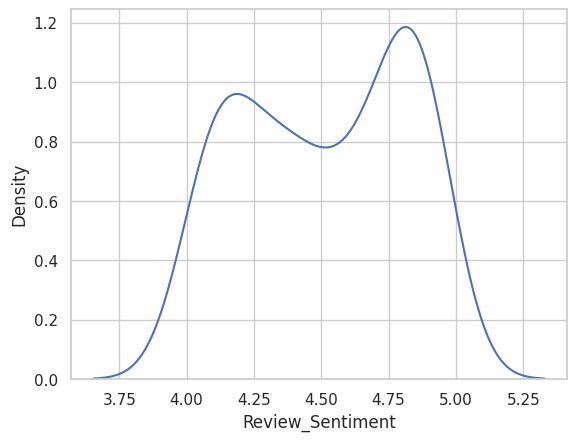

In [91]:
sns.kdeplot(df[df["Review_Sentiment"] >= 4]["Review_Sentiment"])

What is the probability of at least one discount in 10 trials, assuming the probability of 1 discount applied = 0.4?

In [92]:
1 - stats.binom.cdf(n=10, p=0.4, k=1)

np.float64(0.9536425984)


### How often do sensors fail more than 3 times?

In [88]:
1 - stats.poisson.cdf(k=3, mu=2)

np.float64(0.14287653950145296)

### What is the probability of a purchase being greater than £60?
## What distribution does the purchasing follow?

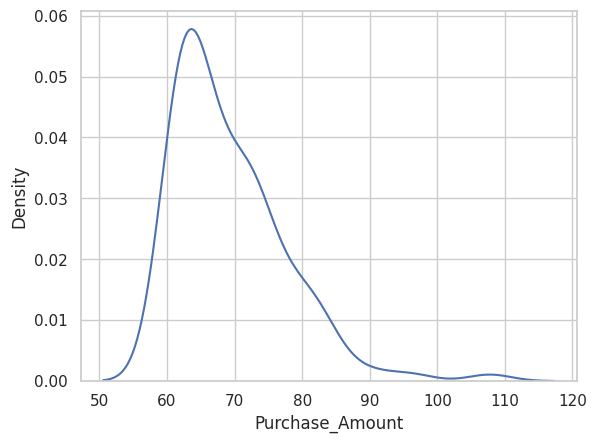

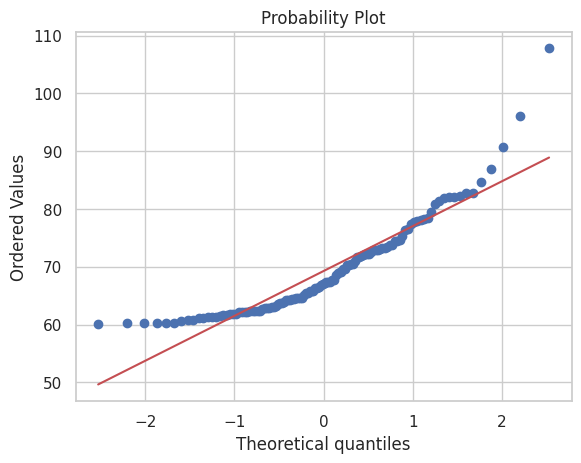

In [74]:
sns.kdeplot(df[df["Purchase_Amount"] > 60]["Purchase_Amount"])
plt.show()

stats.probplot(df[df["Purchase_Amount"] > 60]["Purchase_Amount"], dist="norm", plot=plt)
plt.show()

## Hypothesis Testing

### Are purchase amounts normally distributed?

In [24]:
shapiro_stat, shapiro_p = stats.shapiro(df[df["Purchase_Amount"] > 60]["Purchase_Amount"])

print(f"\nstat: {shapiro_stat}\n",
    f"p: {shapiro_p}")
if shapiro_p <= 0.05:
    print("Result is statistically significant\nReject the null hypothesis\n")
else:
    print("Result is not statistically significant\nAccept the null hypothesis\n")


stat: 0.868692823049729
 p: 6.625615748226822e-09
Result is statistically significant
Reject the null hypothesis



### Does applying a discount affect the purchase amount?

In [32]:
discount_given = df[df["Discount_Applied"] == 1]["Purchase_Amount"]
no_discount_given = df[df["Discount_Applied"] == 0]["Purchase_Amount"]

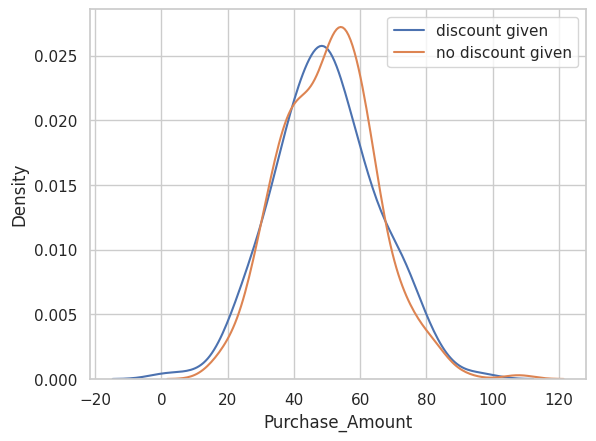

In [66]:
sns.kdeplot(discount_given, label="discount given")
sns.kdeplot(no_discount_given, label="no discount given")
plt.legend()


In [67]:
t_stat, p_value = stats.ttest_ind(discount_given, no_discount_given)
print(f"tstat: {t_stat}\n",
      f"pval: {p_value}")

if t_stat <= 0.05:
      print("Result is statistically significant\nReject the null hypothesis\n")
else:
      print("Result is not statistically significant\nAccept the null hypothesis\n")


tstat: -0.5472374961552712
 pval: 0.5844607233581193
Result is statistically significant
Reject the null hypothesis



In [75]:
df

,Purchase_Amount,Discount_Applied,Sensor_Failures,Review_Sentiment,Daily_Visits,Bounce_Rate,Work_Hours,Productivity_Score
0,57.450712,1,1,1.546404,901.375436,31.622172,32.115018,29.156302
1,47.926035,0,1,3.606559,1288.726401,62.935882,35.985878,31.701559
2,59.715328,0,2,3.954390,748.698621,56.614594,39.630136,27.704406
3,72.845448,1,3,2.262509,1162.641037,35.163250,39.621672,22.157327
4,46.487699,1,3,3.579330,944.207414,38.626194,49.862711,37.924905
...,...,...,...,...,...,...,...,...
495,58.083651,1,1,1.087653,1018.674475,70.150594,42.681455,32.123354
496,34.441308,1,2,2.204184,773.959255,57.013945,29.019361,19.784093
497,47.144920,1,4,3.010525,1482.335335,33.964014,39.189380,24.188148
498,36.865726,0,3,1.224704,1303.278811,58.292528,40.715244,33.301377


## Correlation Analysis

### How strong is the relationship between work hours and productivity?

<Axes: xlabel='Work_Hours', ylabel='Productivity_Score'>

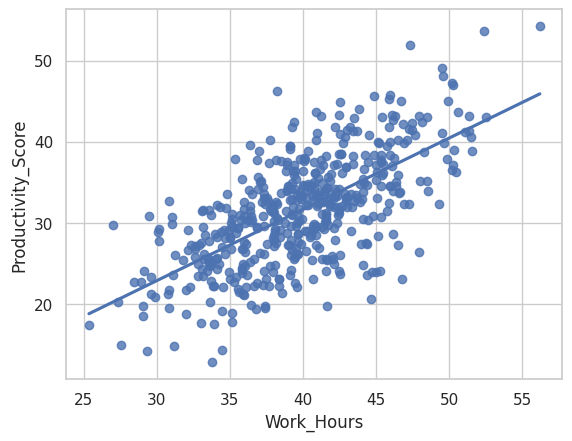

In [83]:
sns.regplot(df, x="Work_Hours", y="Productivity_Score", ci=False)

In [78]:
pearsonr, p_value = stats.pearsonr(df["Work_Hours"], df["Productivity_Score"])

print(f"pearsonr: {pearsonr}\n      pval={p_value}")

pearsonr: 0.6591948448517261
      pval=1.2062942107802595e-63


In [84]:
df

,Purchase_Amount,Discount_Applied,Sensor_Failures,Review_Sentiment,Daily_Visits,Bounce_Rate,Work_Hours,Productivity_Score
0,57.450712,1,1,1.546404,901.375436,31.622172,32.115018,29.156302
1,47.926035,0,1,3.606559,1288.726401,62.935882,35.985878,31.701559
2,59.715328,0,2,3.954390,748.698621,56.614594,39.630136,27.704406
3,72.845448,1,3,2.262509,1162.641037,35.163250,39.621672,22.157327
4,46.487699,1,3,3.579330,944.207414,38.626194,49.862711,37.924905
...,...,...,...,...,...,...,...,...
495,58.083651,1,1,1.087653,1018.674475,70.150594,42.681455,32.123354
496,34.441308,1,2,2.204184,773.959255,57.013945,29.019361,19.784093
497,47.144920,1,4,3.010525,1482.335335,33.964014,39.189380,24.188148
498,36.865726,0,3,1.224704,1303.278811,58.292528,40.715244,33.301377


### Is there a correlation between daily visits and bounce rate?

<Axes: xlabel='Daily_Visits', ylabel='Bounce_Rate'>

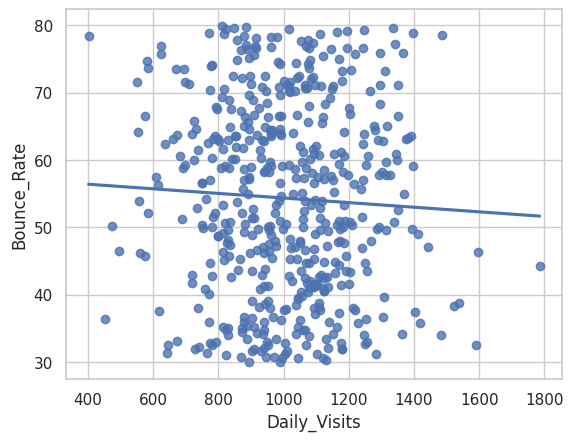

In [85]:
sns.regplot(df, x="Daily_Visits", y="Bounce_Rate", ci=False)

In [86]:
pearsonr, p_value = stats.pearsonr(df["Daily_Visits"], df["Bounce_Rate"])

print(f"pearsonr: {pearsonr}\n      pval={p_value}")

pearsonr: -0.04859947599522451
      pval=0.27808184082148174
